# Taxi Industry Analysis: Strategic Investment Insights

## Background Information

VenturePath Investments is a private firm in US. Due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, it is planning for an investment in Cab industry and as per their Go-to-Market(G2M) strategy they want to understand the market before taking final decision.

*Note: We will use a company name, "VenturePath Investments," instead of "XYZ" for more readability.*

## **Plan**

Our strategic approach is to meticulously analyze the provided datasets, encompassing transaction details, customer demographics, transaction-to-customer mappings, and city-specific cab usage statistics. Through this comprehensive analysis, combined with advanced modeling techniques and hypothesis testing, we aim to uncover actionable insights and trends within the cab industry. Hypothesis testing will allow us to validate assumptions about the factors influencing profitability and market dynamics, providing a robust statistical foundation for our analysis. This in-depth investigation will enable us to identify the most viable company for investment, aligning with VenturePath Investments's objectives and market entry strategy. Our findings will be synthesized into a compelling presentation, offering the executive team of VenturePath Investments a clear roadmap for informed decision-making in the competitive landscape of the cab industry.

## **Analyze**

We will start import packages and examine dataset.

### 2.1 Import, Load and Examine

In [26]:
# Analysis
import numpy as np
from numpy import loadtxt
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
from matplotlib.colors import to_hex
import seaborn as sns

# Hypothesis Testing
from scipy.stats import randint, ttest_ind, chi2_contingency
from scipy import stats

In [27]:
# Import Dataset
df_taxi = pd.read_csv("Taxi_Dataset/Taxi_Data.csv")
df_custID = pd.read_csv("Taxi_Dataset/Customer_ID.csv")
df_tranID = pd.read_csv("Taxi_Dataset/Transaction_ID.csv")
df_city = pd.read_csv("Taxi_Dataset/City.csv")

# Merge Dataset
# Merge taxi data with transaction data on "Transaction ID"
df0 = pd.merge(df_taxi, df_tranID, on="Transaction ID", how="inner")

# Merge the result with customer data on "Customer ID"
df = pd.merge(df0, df_custID, on="Customer ID", how="inner")

# After combine, drop "Transaction ID" and "Customer ID" columns
df.drop(columns=["Transaction ID", "Customer ID"], inplace=True)

df

,Date of Travel,Company,City,Distance Travelled(KM),Price Charged,Cost of Trip,Payment_Mode,Gender,Age,Income (USD/Month)
0,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,Card,Male,28,10813
1,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,Card,Male,27,9237
2,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,Cash,Male,53,11242
3,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,Cash,Male,23,23327
4,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,Card,Male,33,8536
...,...,...,...,...,...,...,...,...,...,...
359387,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,Cash,Male,24,15651
359388,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,Cash,Male,32,6528
359389,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,Cash,Male,56,7966
359390,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,Card,Male,32,6423


In [28]:
# Basic info of data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Date of Travel          359392 non-null  int64  
 1   Company                 359392 non-null  object 
 2   City                    359392 non-null  object 
 3   Distance Travelled(KM)  359392 non-null  float64
 4   Price Charged           359392 non-null  float64
 5   Cost of Trip            359392 non-null  float64
 6   Payment_Mode            359392 non-null  object 
 7   Gender                  359392 non-null  object 
 8   Age                     359392 non-null  int64  
 9   Income (USD/Month)      359392 non-null  int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 27.4+ MB


### 2.2 Data Cleaning

#### 2.2.1 Missing Value

There are no missing values found from the info() function.

#### 2.2.2 Outliers

`Price Charged` and `Cost of Trip`: Is the price reasonable? From `Distance Travelled(KM)`, I found that the maximum distance traveled is 40km, but the max price charge is $2048.03 and max cost of trip is $449.82 (Not shown in this notebook). This is considered an outlier, but due to unavailability of trip duration details, we won't take action about it.

`Date of Travel`: we need to convert this time to human readable instead of integers.
 
`Income`: Range from $2000 to $35000 (Not shown in this notebook), resealable range.

No outliers in other columns were found. 

In [29]:
# Convert to datatime
df["Date of Travel"] = pd.to_datetime(df["Date of Travel"], unit="D", origin="1899-12-30")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Date of Travel          359392 non-null  datetime64[ns]
 1   Company                 359392 non-null  object        
 2   City                    359392 non-null  object        
 3   Distance Travelled(KM)  359392 non-null  float64       
 4   Price Charged           359392 non-null  float64       
 5   Cost of Trip            359392 non-null  float64       
 6   Payment_Mode            359392 non-null  object        
 7   Gender                  359392 non-null  object        
 8   Age                     359392 non-null  int64         
 9   Income (USD/Month)      359392 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 27.4+ MB


Upon applying a maximum price charged limit of $300 to the taxi dataset, the total number of entries decreased from 359,392 to 136,859, representing a reduction to roughly one-third of the original dataset. This significant drop raises a critical question regarding the validity of approximately two-thirds of the data. It suggests that a large portion of the dataset contains fares exceeding what we've determined to be a plausible threshold, possibly indicating either outlier transactions or data recording errors. This observation warrants a deeper investigation into the nature of these high-fare transactions to understand whether they reflect genuine scenarios, such as premium services or long-wait times, or if they are indeed inaccuracies needing correction or exclusion for a more accurate analysis.

#### 2.2.3 Duplicates

In [30]:
# Check duplicates
df.duplicated().sum()

0

### 2.3 Exploratory Data Analysis (EDA)

We will initiate our analysis by focusing on profits, as this metric is of paramount interest to the investment company. For both this analysis and any subsequent modeling efforts, we will treat profits as the dependent variable, aligning our investigations with the "Profits" column.

#### 2.3.1 Basic Overview

##### 2.3.1.1 Company, Payment Method, Gender and City

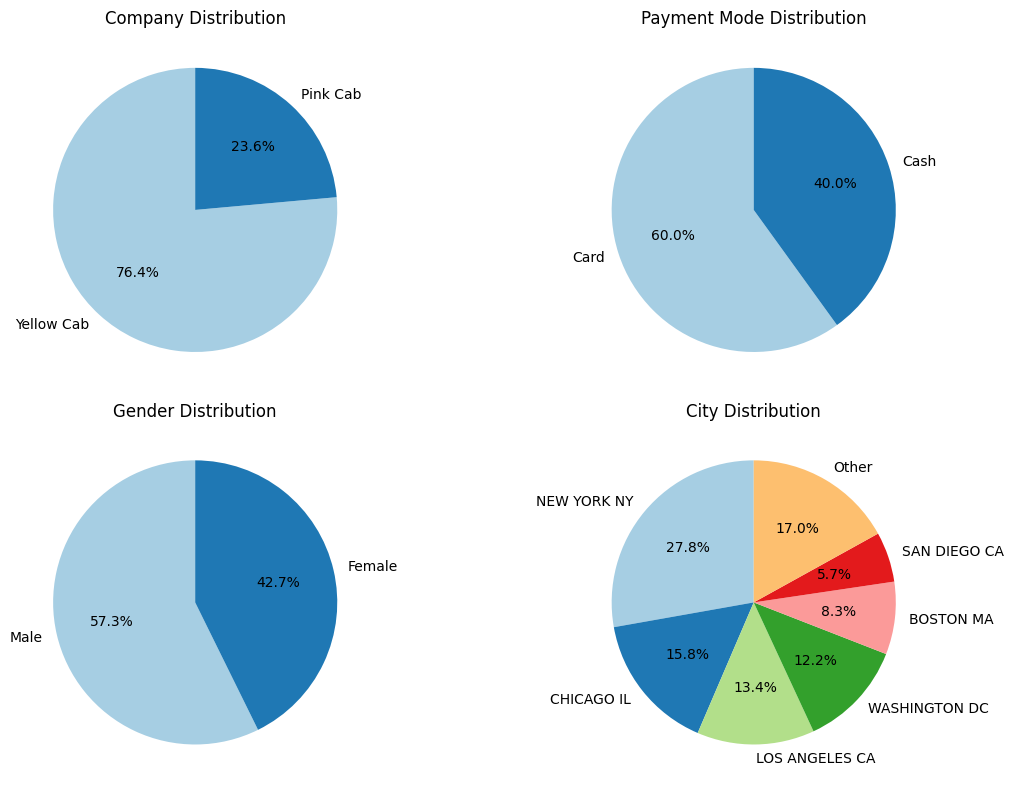

In [31]:
# Create a figure with four subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))  
colors = plt.get_cmap("Paired").colors

# Pie chart for 'Company' value counts
company_counts = df["Company"].value_counts()
axs[0, 0].pie(company_counts, labels=company_counts.index, autopct="%1.1f%%", startangle=90, colors=colors)
axs[0, 0].set_title("Company Distribution")

# Pie chart for 'Payment_Mode' value counts
payment_counts = df["Payment_Mode"].value_counts()
axs[0, 1].pie(payment_counts, labels=payment_counts.index, autopct="%1.1f%%", startangle=90, colors=colors)
axs[0, 1].set_title("Payment Mode Distribution")

# Pie chart for 'Gender' value counts
gender_counts = df["Gender"].value_counts()
axs[1, 0].pie(gender_counts, labels=gender_counts.index, autopct="%1.1f%%", startangle=90, colors=colors)
axs[1, 0].set_title("Gender Distribution")

# Pie chart for 'City' value counts (Top N cities)
top_cities = 6
city_counts = df["City"].value_counts().nlargest(top_cities)
city_counts["Other"] = df["City"].value_counts()[top_cities:].sum() 
axs[1, 1].pie(city_counts, labels=city_counts.index, autopct="%1.1f%%", startangle=90, colors=colors)
axs[1, 1].set_title("City Distribution")

# Adjust layout
plt.tight_layout()
plt.show()

Yellow Cab dominates the market share, nearly 80%; although there are more male customers than female, the difference is not significant.

##### 2.3.1.2 Date of Travel, Distance Travel, Age and Income

Next, we have `Data_of_Travel`, `Distance_Travel`, `Age`, `Income`

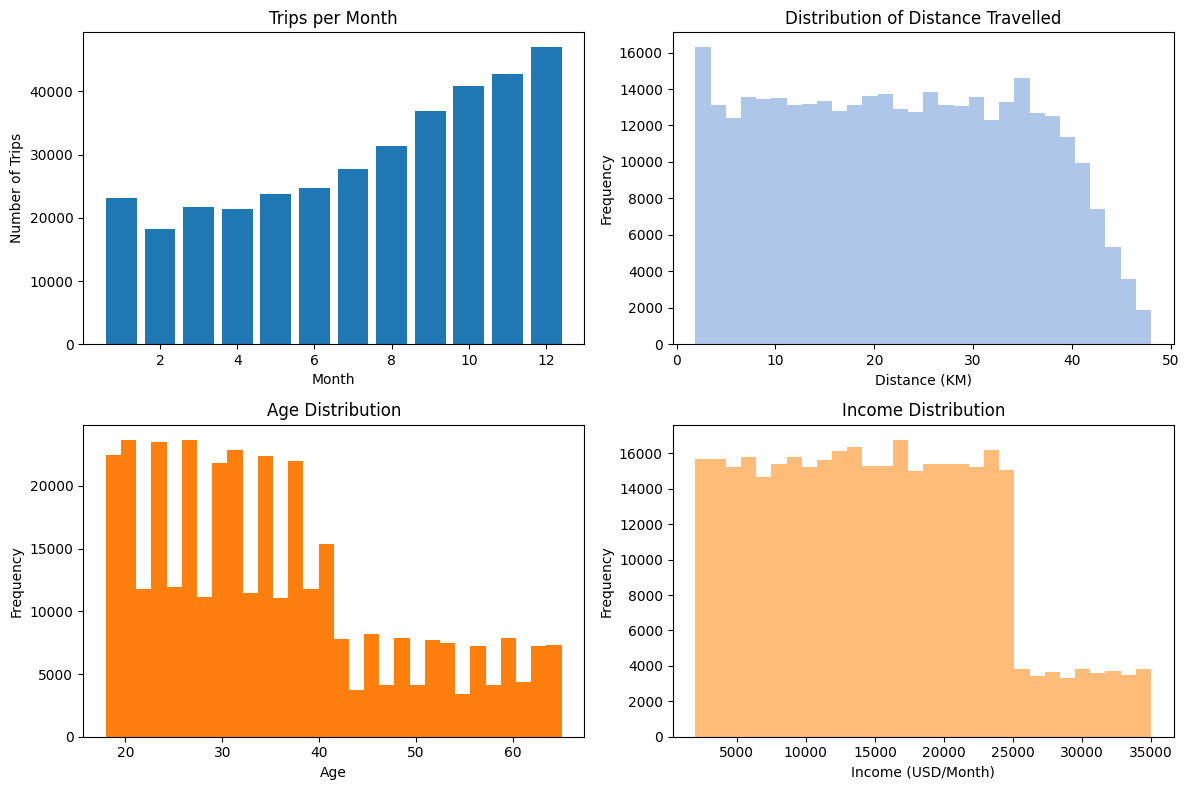

In [32]:
# Create a figure with subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8)) 
color_scheme = plt.get_cmap("tab20").colors

# Plot for "Date of Travel" by month
df_month = df.copy()
df_month["Month"] = pd.to_datetime(df["Date of Travel"]).dt.month
month_counts = df_month["Month"].value_counts().sort_index()
axs[0, 0].bar(month_counts.index, month_counts.values, color=to_hex(color_scheme[0]))
axs[0, 0].set_title("Trips per Month")
axs[0, 0].set_xlabel("Month")
axs[0, 0].set_ylabel("Number of Trips")

# Histogram for "Distance Travelled(KM)"
axs[0, 1].hist(df["Distance Travelled(KM)"], bins=30, color=to_hex(color_scheme[1]))
axs[0, 1].set_title("Distribution of Distance Travelled")
axs[0, 1].set_xlabel("Distance (KM)")
axs[0, 1].set_ylabel("Frequency")

# Histogram for "Age"
axs[1, 0].hist(df["Age"], bins=30, color=to_hex(color_scheme[2]))
axs[1, 0].set_title("Age Distribution")
axs[1, 0].set_xlabel("Age")
axs[1, 0].set_ylabel("Frequency")

# Histogram for "Income (USD/Month)"
axs[1, 1].hist(df["Income (USD/Month)"], bins=30, color=to_hex(color_scheme[3]))
axs[1, 1].set_title("Income Distribution")
axs[1, 1].set_xlabel("Income (USD/Month)")
axs[1, 1].set_ylabel("Frequency")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

- The number of trips per month shows a continuous increase from February to December.
- Regarding distance, the spread is quite even from 2 km to 40 km.
- In terms of income, most people earn an average income between $2,000 and $25,000, with only a few earning above $25,000.

#### 2.3.2 Profit Overview

In [33]:
# Create a new column "Profit"
df["Profit"] = df["Price Charged"] - df["Cost of Trip"]
df["Profit"]

0         57.3150
1         23.6660
2         27.5680
3         25.7980
4         16.8440
           ...   
359387     5.8800
359388     6.9020
359389    87.4200
359390    32.1420
359391    13.9608
Name: Profit, Length: 359392, dtype: float64

##### 2.3.2.1 Distribution of Profits

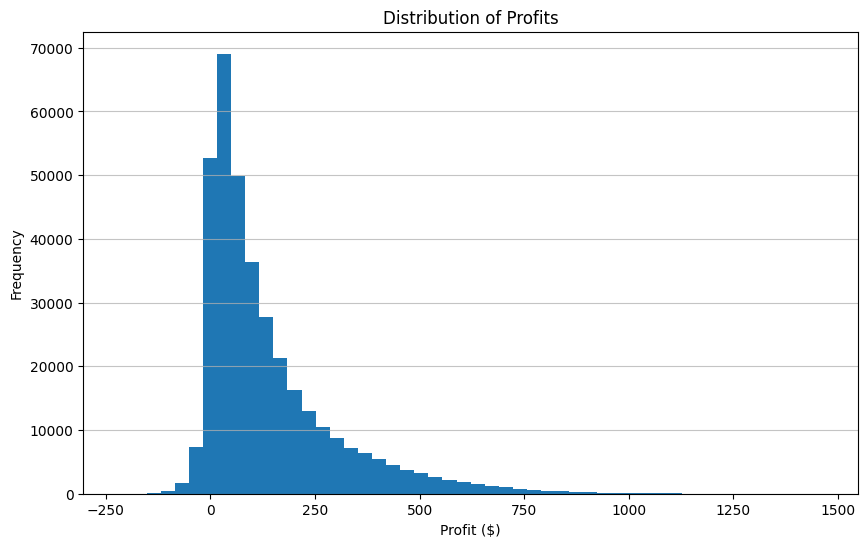

In [34]:
# Plotting the distribution of Profits
plt.figure(figsize=(10, 6))
plt.hist(df["Profit"], bins=50)
plt.title("Distribution of Profits")
plt.xlabel("Profit ($)")
plt.ylabel("Frequency")
plt.grid(axis="y", alpha=0.75)
plt.show()

Overall, profits are most widely distributed around $0 to $150.

##### 2.3.2.2 Monthly Profit by Company

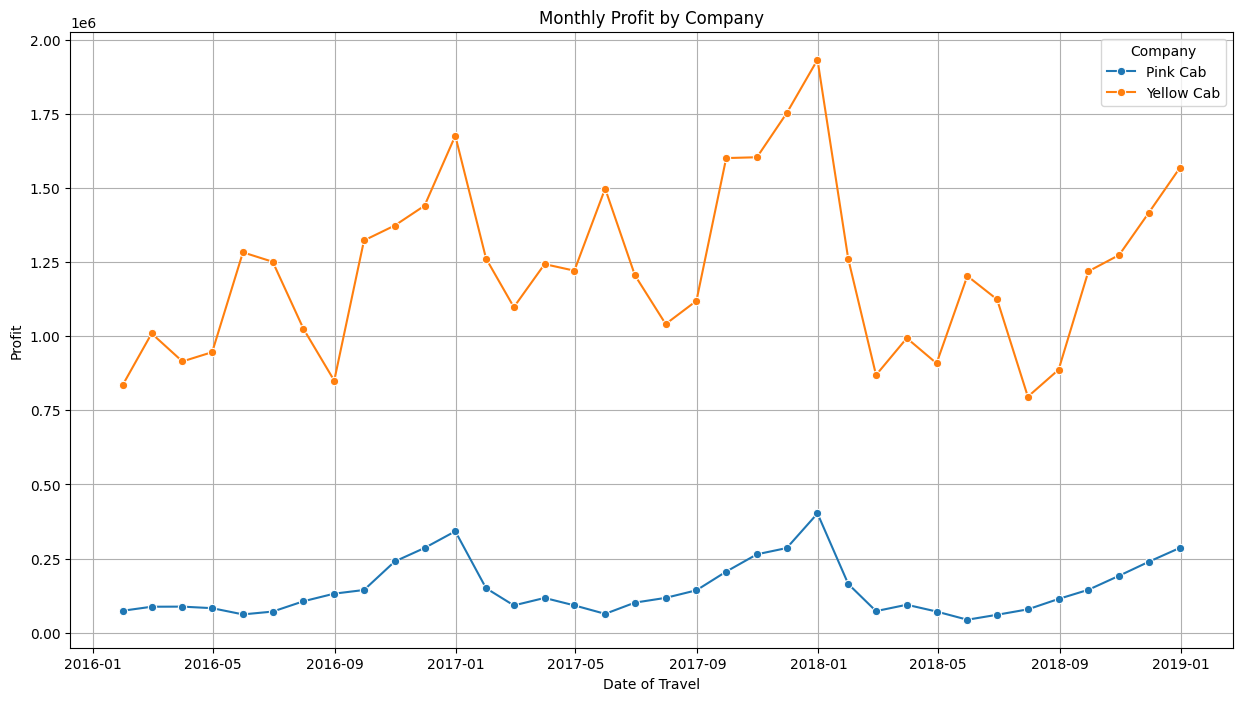

In [35]:
# Plotting graph profit by company over time period
df_month_profit = df.copy()
df_month_profit.set_index("Date of Travel", inplace=True)
monthly_profit = df_month_profit.groupby("Company").resample("ME")["Profit"].sum()
monthly_profit = monthly_profit.reset_index()

plt.figure(figsize=(15, 8))
sns.lineplot(x="Date of Travel", y="Profit", hue="Company", data=monthly_profit, marker="o")

plt.title("Monthly Profit by Company")
plt.xlabel("Date of Travel")
plt.ylabel("Profit")
plt.legend(title="Company")
plt.grid(True)
plt.show()


The total profit of Yellow Cab is much more than Pink Cab, which makes sense considering Yellow Cab's market share is about 70%.

##### 2.3.2.3 Total Profit by City

/tmp/ipykernel_6735/3804537879.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Profit", y="City", data=profit_by_city, palette="viridis")


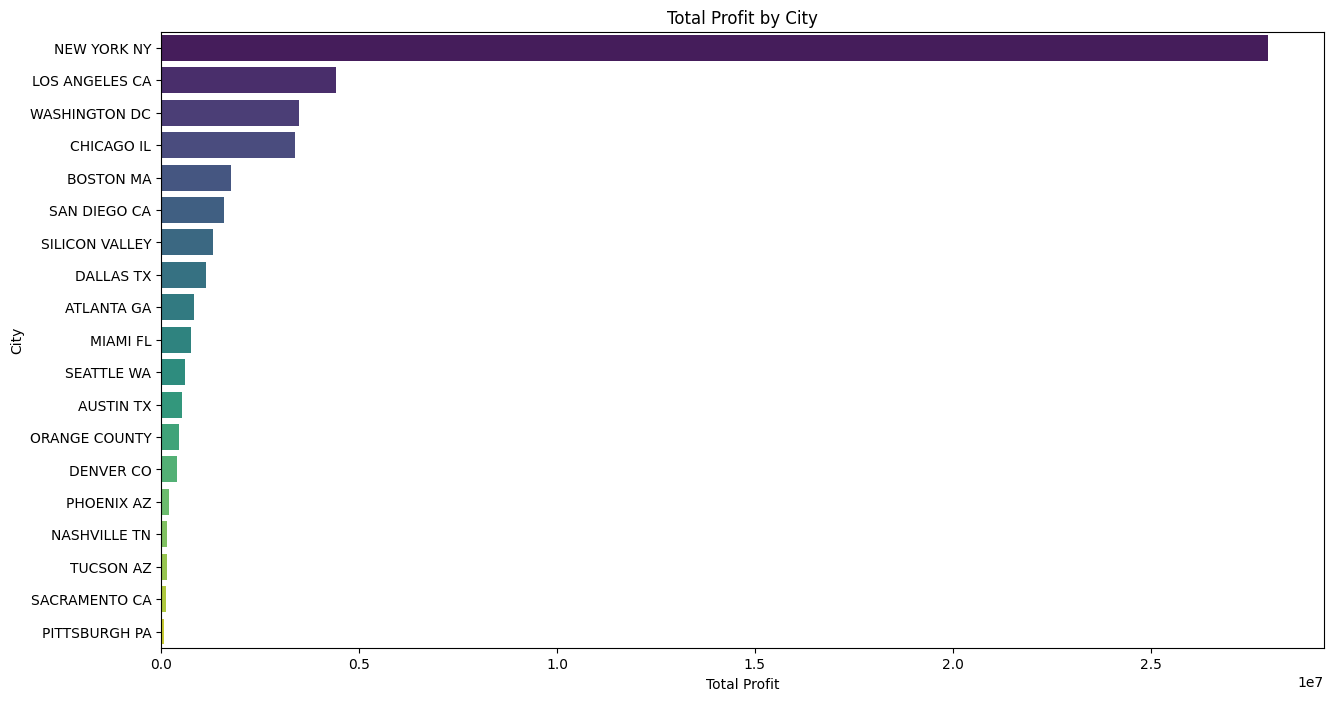

In [36]:
# Plot graph total Profit by City
profit_by_city = df.groupby("City")["Profit"].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(15, 8))
sns.barplot(x="Profit", y="City", data=profit_by_city, palette="viridis")
plt.title("Total Profit by City")
plt.xlabel("Total Profit")
plt.ylabel("City")
plt.show();


In terms of cities, New York is far ahead, becoming the most profitable city, leading the second place by five times.

##### 2.3.2.4 Profit and Customer Demographics

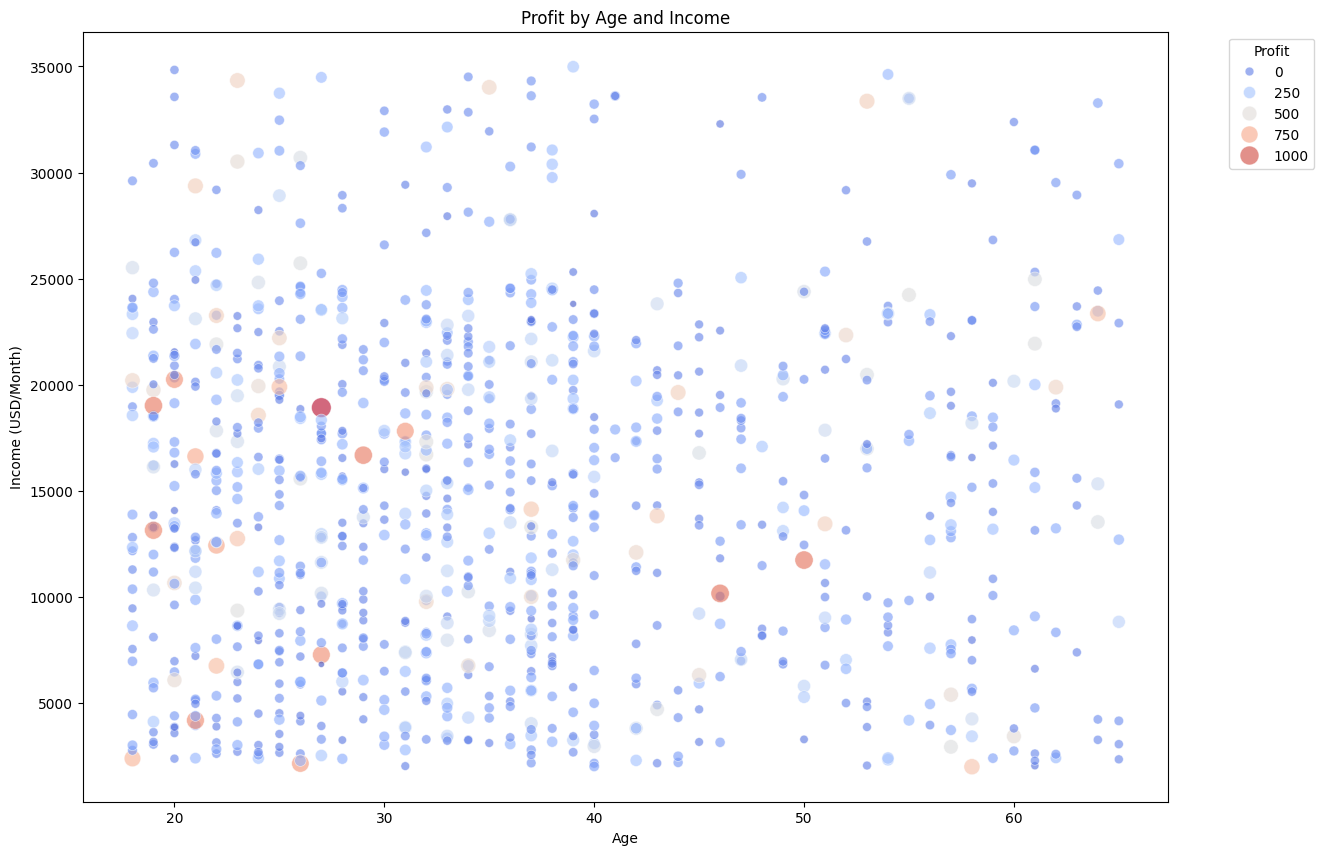

In [37]:
# Sample the data to make the plot more readable
df_sampled = df.sample(n=1000, random_state=1)

# Plot
plt.figure(figsize=(14, 10))
scatter = sns.scatterplot(data=df_sampled, x="Age", y="Income (USD/Month)", size="Profit", 
                          hue="Profit", palette="coolwarm", sizes=(20, 200), alpha=0.6)

plt.title("Profit by Age and Income")
plt.xlabel("Age")
plt.ylabel("Income (USD/Month)")
plt.legend(title="Profit", bbox_to_anchor=(1.05, 1), loc='upper left')

handles, labels = scatter.get_legend_handles_labels()
plt.show()

There isn’t much correlation found between customer characteristics (age and income) and profit.

##### 2.3.2.5 Profit by Distance

/tmp/ipykernel_6735/4125131033.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_profit_by_distance = df_bins.groupby("Distance Bin")["Profit"].mean().reset_index()
/tmp/ipykernel_6735/4125131033.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_profit_by_distance, x="Distance Bin", y="Profit", palette="coolwarm")


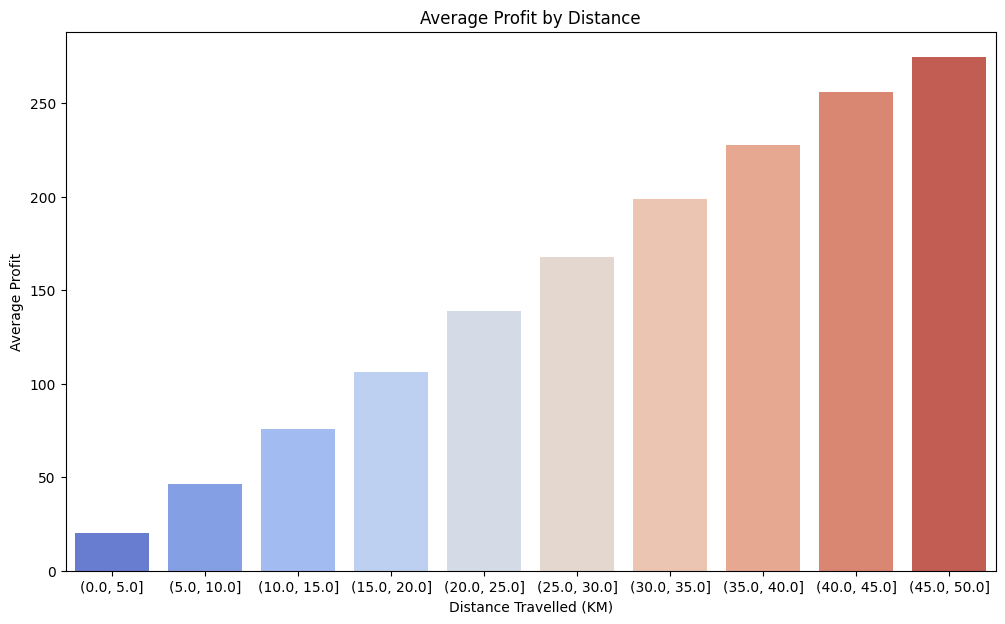

In [38]:
# Define distance bins
distance_bins = np.arange(0, df["Distance Travelled(KM)"].max() + 5, 5)
df_bins = df.copy()
df_bins["Distance Bin"] = pd.cut(df["Distance Travelled(KM)"], bins=distance_bins)

# Calculate average profit for each distance bin
avg_profit_by_distance = df_bins.groupby("Distance Bin")["Profit"].mean().reset_index()

# Convert distance bin to string for plotting
avg_profit_by_distance["Distance Bin"] = avg_profit_by_distance["Distance Bin"].astype(str)

# Plotting
plt.figure(figsize=(12, 7))
sns.barplot(data=avg_profit_by_distance, x="Distance Bin", y="Profit", palette="coolwarm")
plt.title("Average Profit by Distance")
plt.xlabel("Distance Travelled (KM)")
plt.ylabel("Average Profit")
plt.show();


The longer the distance, the higher the profit, which is logical.

#### 2.3.3 City Overview

##### 2.3.3.1 Market Penetration

/tmp/ipykernel_6735/1378331087.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="City", y="Market Penetration", data=df_city_sorted, palette=custom_colors)
/tmp/ipykernel_6735/1378331087.py:14: UserWarning: 
The palette list has fewer values (10) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x="City", y="Market Penetration", data=df_city_sorted, palette=custom_colors)


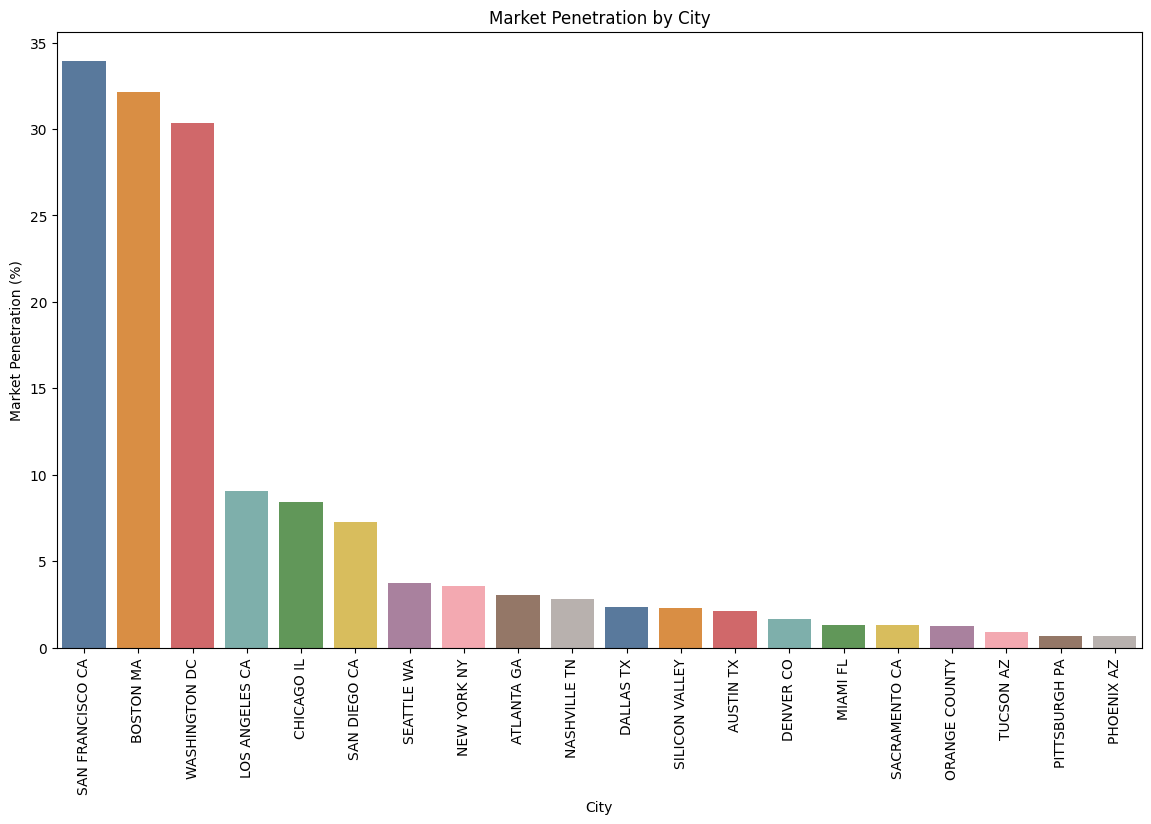

In [39]:
# Convert population and users to integers
df_city["Population"] = df_city["Population"].str.replace(",", "").astype(int)
df_city["Users"] = df_city["Users"].str.replace(",", "").astype(int)

# Calculate market penetration as the percentage of users in the population
df_city["Market Penetration"] = (df_city["Users"] / df_city["Population"]) * 100

# Sort by market penetration
df_city_sorted = df_city.sort_values("Market Penetration", ascending=False)

# Plotting
plt.figure(figsize=(14, 8))
custom_colors = ["#4e79a7", "#f28e2b", "#e15759", "#76b7b2", "#59a14f", "#edc948", "#b07aa1", "#ff9da7", "#9c755f", "#bab0ac"]
sns.barplot(x="City", y="Market Penetration", data=df_city_sorted, palette=custom_colors)
plt.xticks(rotation=90)
plt.title("Market Penetration by City")
plt.xlabel("City")
plt.ylabel("Market Penetration (%)")
plt.show();

San Francisco, Boston, and Washington D.C. have the highest market penetration rates, far ahead of other cities.

##### 2.3.3.2 Users vs Population in Cities

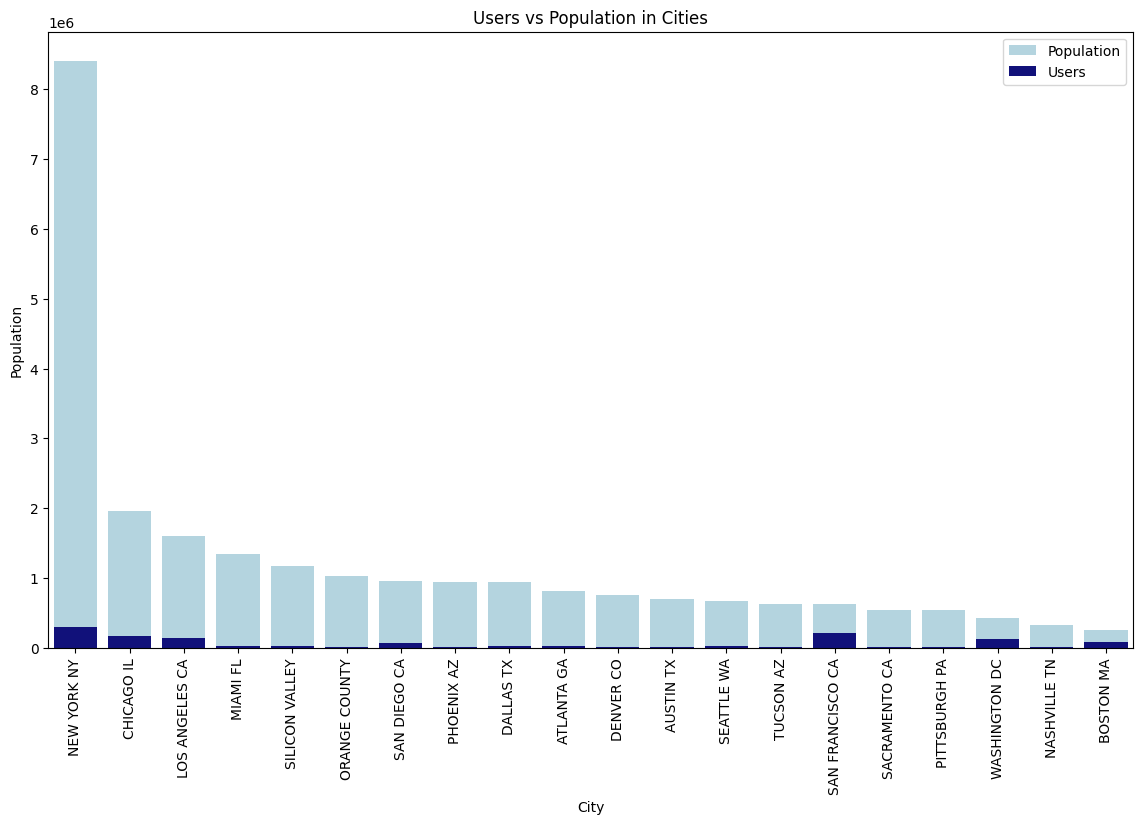

In [40]:
plt.figure(figsize=(14, 8))

# Use the "Population" as the length of the bars and the "Users" as the color intensity
sns.barplot(x="City", y="Population", data=df_city, color="lightblue", label="Population")
sns.barplot(x="City", y="Users", data=df_city, color="darkblue", label="Users")

plt.xticks(rotation=90)
plt.title("Users vs Population in Cities")
plt.legend()
plt.show()

New York has the most significant population and the most users.

##### 2.3.3.3 City vs Income

/tmp/ipykernel_6735/2346834793.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="City", y="Income (USD/Month)", data=df, palette="Set2")


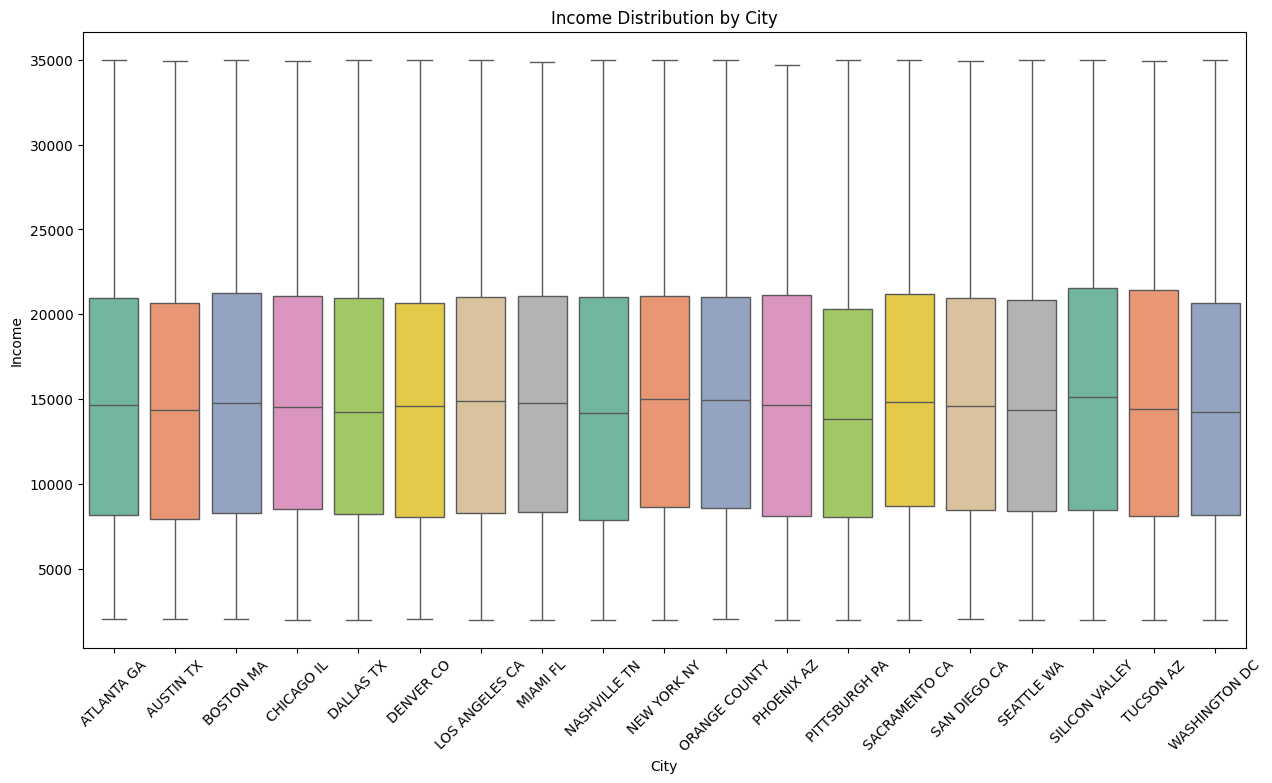

In [41]:
plt.figure(figsize=(15, 8))
sns.boxplot(x="City", y="Income (USD/Month)", data=df, palette="Set2")
plt.xticks(rotation=45)
plt.title("Income Distribution by City")
plt.xlabel("City")
plt.ylabel("Income")
plt.show();

The income distribution is very uniform across all cities, with almost no difference.

#### 2.3.4 Summary Overview

We will plot a heatmap to explore various relationships.

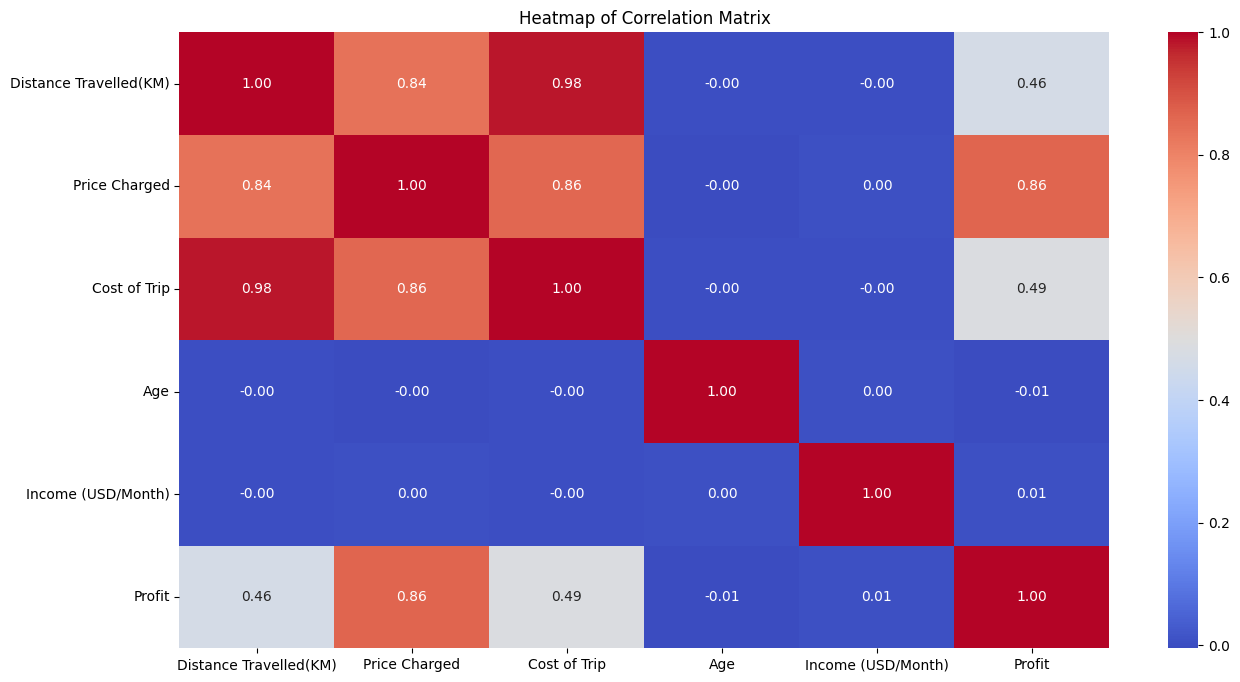

In [42]:
# Before we generate heat map, we should drop all columns contain string
numeric_df = df.select_dtypes(include=["int64", "float64"])

# Create heatmap to show all variable relationship and leave the company
plt.figure(figsize=(15,8))
heatmap = sns.heatmap(numeric_df.corr(), annot=True,fmt=".2f", cmap="coolwarm", cbar=True)
heatmap.set_title("Heatmap of Correlation Matrix");

As expected, the columns with the highest correlation are Price Charged, Cost of Trip, Profits, and Distance.

## **Construct**

**Hypothesis Testing**

Recall, hypothesis testing usually include 4 steps:
1. State the null hypothesis and the alternative hypothesis
2. Choose a signficance level
3. Find the p-value
4. Reject or fail to reject the null hypothesis

*Note: Significance Level will always choose 5% for this project.*

**Result:**

- If the p-value is smaller than the significance level, we **reject** the null hypothesis. This suggests that there is sufficient evidence to conclude that there is a significant difference between the groups being tested.

- If the p-value is larger than the significance level, we **fail to reject** the null hypothesis. This indicates that there is not enough evidence to conclude that a significant difference exists between the groups being tested.

*Note: failing to reject the null hypothesis does NOT mean we accept it as true. It simply means that the evidence was not strong enough to disprove it, given the chosen significance level.*



### 3.1 Company Performance Hypothesis

**Company Performance Hypothesis**: Is there are a significant difference in the average profit per trip between the two cab companies across all cities? This  will help in understanding which company has better financial performance.

**Hypotheses:**

- **Null Hypothesis (H0):** There is NO significant difference in the average profit per trip between the two cab companies across all cities. Mathematically, it can be stated as H0: μ1 = μ2, where μ1 is the average profit per trip for Company A, and μ2 is the average profit per trip for Company B.

- **Alternative Hypothesis (H1):** There IS a significant difference in the average profit per trip between the two cab companies across all cities. This can be stated as H1: μ1 ≠ μ2.


**Significance Level - 5%**

**Find P-Value**

In [43]:
# Isolate the "Profit" column for both company.
Pink_Cab = df[df["Company"] == "Pink Cab"]["Profit"]
Yellow_Cab = df[df["Company"] == "Yellow Cab"]["Profit"]

# Find P Value
stats.ttest_ind(a=Pink_Cab, b=Yellow_Cab, equal_var=False)

TtestResult(statistic=-230.99551452746311, pvalue=0.0, df=313532.12464142457)

**Result:**

From the result, we can **reject** the null hypothesis and conclude that there is a statistically significant difference in the average profit per trip between Pink Cab and Yellow Cab across all cities. This finding suggests that one of the companies is more profitable on a per-trip basis, which is a crucial factor for VenturePath Investments to consider in their investment decision.

#### 3.2 Market Penetration Hypothesis

**Market Penetration Hypothesis**: Does the company with the highest number of users in cities with the largest populations generate more profit? This aims to analyze the correlation between the market penetration (in terms of users) of the cab companies and their profitability in densely populated cities.

**Hypothesis:**

- **Null Hypothesis (H0):** There is NO significant difference in the profits generated by cab companies in cities with the largest populations, regardless of the number of users.

- **Alternative Hypothesis (H1):** The company with the highest number of users in cities with the largest populations generates significantly more profit than the company with fewer users.

**Significance Level - 5%**

**Find P-Value**

In [44]:
# Merge dataset
df_hypo2 = pd.merge(df, df_city, on="City")

# Identify the largest cities by population
largest_cities = df_city.nlargest(5, "Population")["City"]

# Isolate the data for the largest cities
largest_city_data = df_hypo2[df_hypo2["City"].isin(largest_cities)]

# Isolate profit data for the two companies
profit_pink_cab = largest_city_data[largest_city_data["Company"] == "Pink Cab"]["Profit"]
profit_yellow_cab = largest_city_data[largest_city_data["Company"] == "Yellow Cab"]["Profit"]

# Perform the t-test
stats.ttest_ind(a=profit_pink_cab, b=profit_yellow_cab, equal_var=False)


TtestResult(statistic=-218.89741242558824, pvalue=0.0, df=187858.54728451738)

**Result:**

From the result, we can **reject** the null hypothesis. This indicates that the difference in the average profits between Pink Cab and Yellow Cab in the largest cities by population is extremely statistically significant. The large magnitude of the t-statistic suggests a very pronounced difference between the profits of the two companies in these cities, highlighting the importance of market penetration in determining profitability.

### 3.3 Customer Demographic Hypothesis

**Customer Demographic Hypothesis**: Does the average income of users significantly affect their choice of cab company? This will explore if there's a preference for a specific cab company among users with different income levels.

**Hypothesis:**

- **Null Hypothesis (H0):** The average income of users does NOT significantly affect the choice of cab company. Users of different income levels choose cab companies at similar rates.

- **Alternative Hypothesis (H1):** The average income of users significantly affects the choice of cab company. Users with different income levels show a distinct preference for one cab company over the other.

**Significance Level - 5%**

**Find P-Value**

In [45]:
# Segment users into income brackets or quantiles
# Create quantiles for income levels
df_hypo3 = df.copy()
df_hypo3["Income Quantile"] = pd.qcut(df_hypo3["Income (USD/Month)"], q=4, labels=["Q1", "Q2", "Q3", "Q4"])

# Step 2: Calculate the count of users in each income bracket for each company
# This creates a contingency table
contingency_table = pd.crosstab(df_hypo3["Income Quantile"], df_hypo3["Company"])

# Step 3: Conduct a chi-squared test for independence
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"TtestResult(chi2={chi2.round(3)}, pvalue={p_value.round(3)})")

TtestResult(chi2=6.926, pvalue=0.074)


**Result:**

From the result, we **fail to reject** the null hypothesis. While there may be a trend or a slight association between user income levels and cab company preference, it is not strong enough to be considered statistically significant at the 5% level. However, it is close to the threshold, which could warrant further investigation or consideration of practical significance, suggesting that income may still play a role in consumer choice under certain conditions.

### 3.4 Service Utilization Hypothesis

**Service Utilization Hypothesis**: Is there a significant difference in the distance traveled by customers between the two cab companies, and does this affect overall company profits? This could indicate which company is preferred for longer or shorter trips.

**Hypothesis:**

- **Null Hypothesis (H0):** There is NO significant difference in the average distance traveled by customers between the two cab companies.

- **Alternative Hypothesis (H1):** There IS a significant difference in the average distance traveled by customers between the two cab companies, which may affect overall company profits.

**Significance Level - 5%**

**Find P-Value**

In [46]:
# Isolate the distance traveled data for each company
distance_pink_cab = df[df["Company"] == "Pink Cab"]["Distance Travelled(KM)"]
distance_yellow_cab = df[df["Company"] == "Yellow Cab"]["Distance Travelled(KM)"]

# Perform t-test
ttest_ind(distance_pink_cab, distance_yellow_cab, equal_var=False)  

TtestResult(statistic=-0.19970297254383812, pvalue=0.8417131770122342, df=140913.77838204397)

**Result:**

From the result, we **fail to reject** the null hypothesis, indicating that the difference in average distances traveled by customers between Pink Cab and Yellow Cab is not statistically significant. This suggests that customer preferences for Pink Cab versus Yellow Cab are not based on the distance they need to travel, implying that other factors may influence the choice of cab service.

### 3.5 Gender Preference Hypothesis

**Gender Preference Hypothesis:** Does the preference for a cab company differ significantly between male and female users? This examines if gender plays a role in the choice of cab service.

- **Null Hypothesis (H0):** There is NO significant difference in the preference for a cab company between male and female users. Gender does not play a role in the choice of cab service.

- **Alternative Hypothesis (H1):** The preference for a cab company differs significantly between male and female users, indicating that gender plays a role in the choice of cab service.

**Significance Level - 5%**

**Find P-Value**

In [47]:
# Create a contingency table of gender and company
contingency_table = pd.crosstab(df["Gender"], df["Company"])

# Perform the chi-squared test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"TtestResult(chi2={chi2}, pvalue={p_value})")

TtestResult(chi2=107.22063897254299, pvalue=3.982674650131372e-25)


**Result:**

From the result, we **reject** the null hypothesis. This indicates that the observed association between gender and cab company choice is highly statistically significant. There is sufficient evidence to conclude that there is a significant difference in the preference for a cab company between male and female users, highlighting that gender plays a role in the choice of cab service.

## **Execute**

### 4.1 Analysis Summary

- **Basic Analysis** highlights Yellow Cab's dominant market share and the steady increase in trips from February to December, alongside an even spread of trip distances and a wide distribution of customer incomes.

- **Profit Analysis** reveals that Yellow Cab's total profit notably surpasses that of Pink Cab, correlating with its market share. Notably, New York emerges as a significantly profitable city for cab services, with profits increasing alongside trip distances.

- **City Analysis** indicates high market penetration rates in San Francisco, Boston, and Washington D.C., with New York standing out in terms of user base relative to population.


### 4.2 Hypothesis Test Summary

- We observed a **statistically significant difference in average profit per trip** between Pink Cab and Yellow Cab, suggesting varying profitability which could influence investment decisions.

- The **Market Penetration Hypothesis** was confirmed, highlighting the critical role of market penetration in profitability, especially in the largest cities.

- The **Customer Demographic and Service** Utilization Hypotheses indicated no significant effects of income levels or travel distances on cab company preference, suggesting other factors at play.

- The **Gender Preference Hypothesis** showed a significant difference in company preference between genders, pointing to potential targeted marketing strategies.

### 4.3 Insights and Investment Suggestion

Our analysis cover the cab industry, where factors such as market penetration, profitability, and demographic preferences play crucial roles. Yellow Cab's dominance in market share and profitability is clear, yet this alone doesn't provide a full picture of company performance. Critical factors such as operational efficiency, customer satisfaction, service quality, and customer loyalty remain to be thoroughly examined.

While Yellow Cab presents an attractive investment opportunity based on market share and profitability, Pink Cab's position suggests potential untapped opportunities, especially when considering demographic preferences like gender. Before making a definitive investment decision, VenturePath Investments should seek further information on customer satisfaction and service quality. These factors are pivotal in assessing the long-term sustainability and growth potential of both companies.

### 4.4 Conclusion

Given the current data, Yellow Cab shows strong performance indicators that align with VenturePath Investments' criteria for profitability and market penetration. However, the investment decision should not overlook the importance of customer-centric metrics, which could significantly impact the long-term viability and competitiveness of the chosen company. Therefore, we recommend a balanced approach, considering both quantitative financial metrics and qualitative measures of customer satisfaction and service quality, to make the most informed investment decision in the cab industry.
